<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

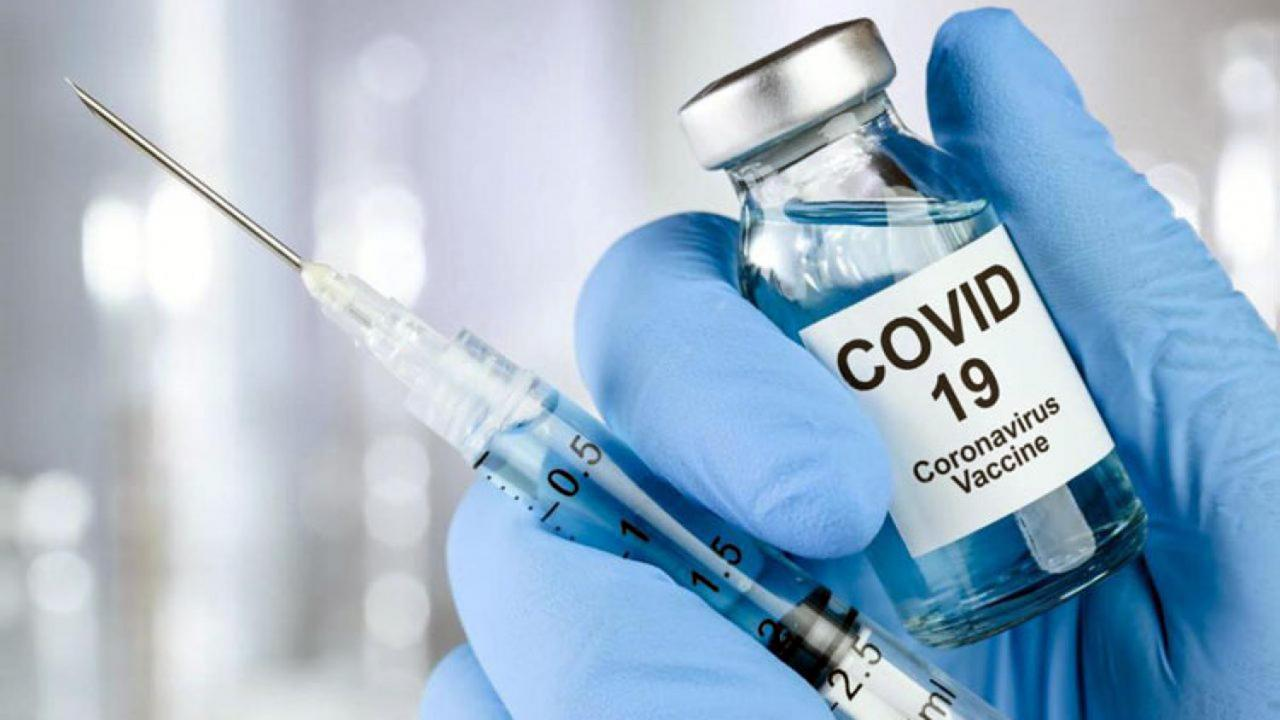

# Procesamiento de Lenguage Natural

## Análisis de sentimiento

## *Fabio Peña* 



In [ ]:
import pandas as pd
import tweepy

In [ ]:
# Leer llaves
keys = pd.read_csv("key_demovf_profe.csv", header=None)
keys = dict(zip(keys[0],keys[1]))

In [3]:
# Autorizar a través API
auth = tweepy.OAuthHandler(keys['api_key'], keys['api_key_secret'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

In [23]:
tweets = tweepy.Cursor(api.search,
                       q=['Vacuna -BT'],
                       lang='es',
                       geocode=f'4.649178,-74.062827,4mi',
                       tweet_mode='extended',
                       include_rts=False).items(500)

In [25]:
t = []

for tweet in tweets:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append("Bogotá")
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
    t.append(temp)

In [26]:
data = pd.DataFrame(t)
data.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']
data.head()

,tweet,date,city,user_location,id,link
0,RT @C5N: ⭕ #ALERTA \n\nLas primeras dosis de l...,2020-11-27 22:15:36,Bogotá,,1332448012438794246,https://twitter.com/i/web/status/1332448012438...
1,"Sin vacuna efectiva contra COVID-19, ¡no habrá...",2020-11-27 22:15:34,Bogotá,"Saltillo, Coahuila de Zaragoza",1332448005446897668,https://twitter.com/i/web/status/1332448005446...
2,"Fui al seguro, y una doctora le pregunta a otr...",2020-11-27 22:15:34,Bogotá,,1332448002896642053,https://twitter.com/i/web/status/1332448002896...
3,Voy a tener que ir hasta allá a ponerme la vac...,2020-11-27 22:15:33,Bogotá,Dear or Die 🌹,1332447998039748614,https://twitter.com/i/web/status/1332447998039...
4,Y México \nNo aparece en la lista porque están...,2020-11-27 22:15:31,Bogotá,,1332447992893349888,https://twitter.com/i/web/status/1332447992893...


In [27]:
ciudades = pd.read_csv(r'C:\Users\ITHELATH\Documents\NLPTW\co_small.csv')
ciudades.head()

,city,lat,lng,country,iso2,admin,capital,population,population_proper
0,Bogotá,4.649178,-74.062827,Colombia,CO,Bogotá,primary,7772000.0,6333661.0
1,Medellín,6.251840,-75.563591,Colombia,CO,Antioquia,admin,3297000.0,1999979.0
2,Cali,3.437222,-76.522500,Colombia,CO,Valle del Cauca,admin,2254000.0,2178836.0
3,Barranquilla,10.963889,-74.796389,Colombia,CO,Atlántico,admin,1798000.0,1244491.0
4,Bucaramanga,7.125393,-73.119804,Colombia,CO,Santander,admin,1009000.0,571820.0


In [28]:
data.to_csv('tw.csv', index = False)

Pre-procesamiento para Twitter

In [29]:
data = data[['tweet', 'date', 'city']]
data.head()

,tweet,date,city
0,RT @C5N: ⭕ #ALERTA \n\nLas primeras dosis de l...,2020-11-27 22:15:36,Bogotá
1,"Sin vacuna efectiva contra COVID-19, ¡no habrá...",2020-11-27 22:15:34,Bogotá
2,"Fui al seguro, y una doctora le pregunta a otr...",2020-11-27 22:15:34,Bogotá
3,Voy a tener que ir hasta allá a ponerme la vac...,2020-11-27 22:15:33,Bogotá
4,Y México \nNo aparece en la lista porque están...,2020-11-27 22:15:31,Bogotá


In [30]:
import re

pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweet']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
             
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag,"")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention,"")
        
    return text, links, hashtags, mentions

In [31]:
data[['clean', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')

data.head()

,tweet,date,city,clean,links,hashtags,mentions
0,RT @C5N: ⭕ #ALERTA \n\nLas primeras dosis de l...,2020-11-27 22:15:36,Bogotá,RT ⭕ \n\nLas primeras dosis de la vacuna de ...,[],[#ALERTA],[@C5N:]
1,"Sin vacuna efectiva contra COVID-19, ¡no habrá...",2020-11-27 22:15:34,Bogotá,"Sin vacuna efectiva contra COVID-19, ¡no habrá...",[https://t.co/tWhurjKngq],"[#Coahuila, #Saltillo, #UAAAN]",[]
2,"Fui al seguro, y una doctora le pregunta a otr...",2020-11-27 22:15:34,Bogotá,"Fui al seguro, y una doctora le pregunta a otr...",[],[],[]
3,Voy a tener que ir hasta allá a ponerme la vac...,2020-11-27 22:15:33,Bogotá,Voy a tener que ir hasta allá a ponerme la vac...,[https://t.co/89JcTq3uxV],[],[]
4,Y México \nNo aparece en la lista porque están...,2020-11-27 22:15:31,Bogotá,Y México \nNo aparece en la lista porque están...,[https://t.co/evfniMDTZO],"[#VxM, #VotoUtil2021]",[]


In [32]:
import regex
import emoji

def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

data['emojis'] = data['clean'].apply(lambda text: get_emojis(text))

In [33]:
data.head()

,tweet,date,city,clean,links,hashtags,mentions,emojis
0,RT @C5N: ⭕ #ALERTA \n\nLas primeras dosis de l...,2020-11-27 22:15:36,Bogotá,RT ⭕ \n\nLas primeras dosis de la vacuna de ...,[],[#ALERTA],[@C5N:],[⭕]
1,"Sin vacuna efectiva contra COVID-19, ¡no habrá...",2020-11-27 22:15:34,Bogotá,"Sin vacuna efectiva contra COVID-19, ¡no habrá...",[https://t.co/tWhurjKngq],"[#Coahuila, #Saltillo, #UAAAN]",[],[]
2,"Fui al seguro, y una doctora le pregunta a otr...",2020-11-27 22:15:34,Bogotá,"Fui al seguro, y una doctora le pregunta a otr...",[],[],[],"[🤣, 🤣, 🤣, 🤣, ✌]"
3,Voy a tener que ir hasta allá a ponerme la vac...,2020-11-27 22:15:33,Bogotá,Voy a tener que ir hasta allá a ponerme la vac...,[https://t.co/89JcTq3uxV],[],[],[]
4,Y México \nNo aparece en la lista porque están...,2020-11-27 22:15:31,Bogotá,Y México \nNo aparece en la lista porque están...,[https://t.co/evfniMDTZO],"[#VxM, #VotoUtil2021]",[],[]


# Visualizaciones usando Plotly


In [34]:
data['fecha'] = data.date.dt.date
temp = pd.DataFrame(data.fecha.value_counts()).reset_index()
temp.columns = ['fecha', 'cnt']
temp = temp.sort_values('fecha')
temp

,fecha,cnt
0,2020-11-27,500


In [35]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)

In [36]:
from collections import Counter

temp_emojis = pd.DataFrame(list(zip(Counter(sum(data.emojis.values,[])).keys(),Counter(sum(data.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head()

,emoji,cnt
4,🇺🇸,33
6,👇,16
10,🇬🇧,12
5,🔴,10
0,⭕,7


In [37]:
trace = go.Bar(x=temp_emojis.emoji.values[:20],
               y=temp_emojis.cnt.values[:20])

layout = go.Layout(title='Emojis más usados')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [38]:
import pandas as pd
import numpy as np
import tweepy
import re
import regex
import emoji

from googletrans import Translator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

from flair.models import TextClassifier
from flair.data import Sentence

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
import PIL.Image
from IPython.display import display

In [39]:
traductor = Translator()
data['ing'] = data['clean'].apply(lambda valor: traductor.translate(valor, src='es', dest='en'))
data['ingles'] = data['ing'].apply(lambda valor: valor.text)

###  Análisis de sentimiento 
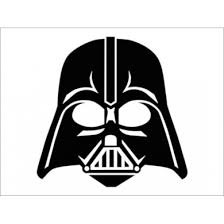


In [40]:
vader = SentimentIntensityAnalyzer()
classifier = TextClassifier.load('en-sentiment')

def sent_flair(texto):
    sentence = Sentence(texto)
    classifier.predict(sentence)
    result = sentence.labels[0]
    label = result.value
    score = result.score
    if label == 'POSITIVE':
        return score
    if label == 'NEGATIVE':
        return -1 * score
    return score

2020-11-27 17:24:57,573 loading file C:\Users\ITHELATH\.flair\models\sentiment-en-mix-distillbert_3.1.pt


In [41]:
data['sent_TextBlob'] = data['ingles'].apply(lambda valor: TextBlob(valor).sentiment.polarity)
data['sent_Vader'] = data['ingles'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data['sent_flair'] = data['ingles'].apply(lambda valor: sent_flair(valor))

In [72]:
data=data[['tweet','clean','ingles','sent_TextBlob','sent_Vader','sent_flair']]
data.head()

,tweet,clean,ingles,sent_TextBlob,sent_Vader,sent_flair
0,RT @C5N: ⭕ #ALERTA \n\nLas primeras dosis de l...,RT ⭕ \n\nLas primeras dosis de la vacuna de ...,RT ⭕\n\nThe first doses of the Pfizer-BioNTech...,0.250,0.0258,-0.983199
1,"Sin vacuna efectiva contra COVID-19, ¡no habrá...","Sin vacuna efectiva contra COVID-19, ¡no habrá...","Without an effective COVID-19 vaccine, there w...",0.375,-0.8420,-0.999621
2,"Fui al seguro, y una doctora le pregunta a otr...","Fui al seguro, y una doctora le pregunta a otr...","I went to the insurance, and a doctor asks ano...",0.200,0.9169,-0.999979
3,Voy a tener que ir hasta allá a ponerme la vac...,Voy a tener que ir hasta allá a ponerme la vac...,I'm going to have to go there to get the vaccine,0.000,0.0000,-0.999638
4,Y México \nNo aparece en la lista porque están...,Y México \nNo aparece en la lista porque están...,And Mexico\nIt does not appear on the list bec...,0.000,0.0000,-0.999557


In [77]:
data.to_csv('tw2.csv', index = False)

 ### ¿Cuál es el tuit más positivo y más negativo?

**_Tuit mas Negativo_**

In [43]:
data[['tweet','sent_TextBlob']].sort_values('sent_TextBlob').head(1).values

array([['RT @carlos_pimiento: Aprovecho la fake news difundida por huele ped0s del narco Calderón, Aguilar Camín, sobre la vacuna de AstraZeneca, pa…',
        -0.5]], dtype=object)

**_Tuit mas Positivo_**

In [44]:
data[['tweet','sent_TextBlob']].sort_values('sent_TextBlob').tail(1).values

array([['RT @heriluzqm: @GNB_CZ43 @FabioZavarsep @GNBGDJuvenal @GNBoficialVE La mejor 💉Vacuna contra está plaga del Covid es la Prevención cumplir c…',
        1.0]], dtype=object)

### ¿Cuántos tuits positivos/negativos hay en los Datos?

In [45]:
columnas = ['sent_TextBlob','sent_Vader','sent_flair']

tweetsByMethod = []

for columna in columnas:
    lista = []
    print(f"Método: {columna}")
    print(f"* Cantidad de Tuits Negativos: {len(data[data[columna]<0])}")
    print(f"* Cantidad de Tuits Positivos: {len(data[data[columna]>0])}")
    print(f"* Cantidad de Tuits Neutros: {len(data[data[columna]==0])}")
    lista.append(columna)
    lista.append(len(data[data[columna]<0]))
    lista.append(len(data[data[columna]>0]))
    lista.append(len(data[data[columna]==0]))
    print("##############")
    tweetsByMethod.append(lista)
dfTbM = pd.DataFrame(tweetsByMethod)
dfTbM.columns = ['Método', 'numNegativos', 'numPositivos', 'numNeutros']

Método: sent_TextBlob
* Cantidad de Tuits Negativos: 21
* Cantidad de Tuits Positivos: 65
* Cantidad de Tuits Neutros: 414
##############
Método: sent_Vader
* Cantidad de Tuits Negativos: 111
* Cantidad de Tuits Positivos: 121
* Cantidad de Tuits Neutros: 268
##############
Método: sent_flair
* Cantidad de Tuits Negativos: 271
* Cantidad de Tuits Positivos: 229
* Cantidad de Tuits Neutros: 0
##############


In [46]:
print(f"* Cantidad de Tuits Negativos: {len(data[data[columna]<0])}")

* Cantidad de Tuits Negativos: 271


In [47]:
 print(f"* Cantidad de Tuits Positivos: {len(data[data[columna]>0])}")

* Cantidad de Tuits Positivos: 229


In [48]:
print(f"* Cantidad de Tuits Neutros: {len(data[data[columna]==0])}")

* Cantidad de Tuits Neutros: 0


###   Nubes de palabras por sentimiento


In [49]:
dataPositiva = data[data['sent_Vader']>0]
dataNegativa = data[data['sent_Vader']<0]
textoPositivo = dataPositiva.clean.str.cat(sep=" ")
textoNegativo = dataNegativa.clean.str.cat(sep=" ")


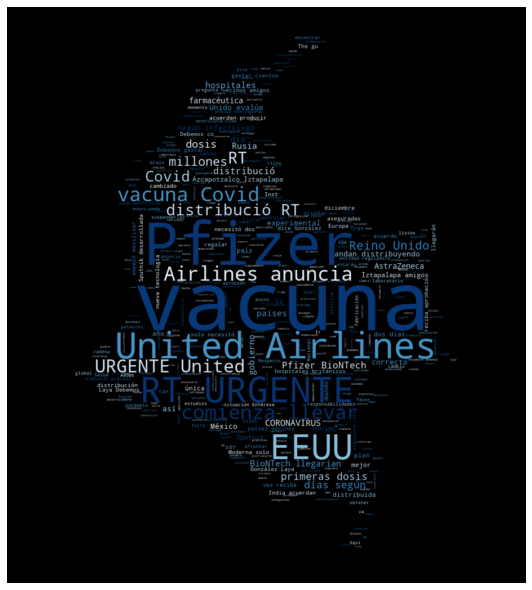

In [50]:
col = PIL.Image.open("./col.jpg")
colMask = np.array(col)
wordcloud = WordCloud(width=1000, height=500,
                     max_font_size= 150, max_words=400,
                     background_color='black',
                      mask=colMask,
                     colormap='Blues',
                     stopwords=stopwords).generate(textoPositivo)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [51]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from nltk.stem import WordNetLemmatizer

In [52]:
stop = stopwords.words('english')

new_stop = (['abov', 'ani', 'becaus', 'befor', 'could', 
             'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 
             'onli', 'dosis', 'distribucion', 'llevar', 'dias', 'comienza', 'podria', 'necesito', 'vacuna',
            'vaccin', 'covid', 'coronavirus'])

In [54]:
stop = stopwords.words('english')

new_stop = (['abov', 'ani', 'becaus', 'befor', 'could', 
             'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 
             'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'would', 'yourselv', 'covidvaccin',
            'vaccin', 'covid', 'coronavirus'])
stop = stop + new_stop

In [55]:
lemmatizer = WordNetLemmatizer() 
stemmer = SnowballStemmer('english')

In [56]:
def tokenize_and_stem(text):
    '''applies tokenization and stemming'''
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        token = stemmer.stem(token)
        if len(token) > 2:
            filtered_tokens.append(token)
    return filtered_tokens

In [57]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    '''shows topics identified in topic modeling'''
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [62]:
import numpy as np 
import pandas as pd 
import nltk
import heapq
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from matplotlib.pyplot import figure
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
import os 
import pandas as pd
import json
from tqdm import tqdm,tqdm_notebook
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
%matplotlib inline

In [63]:
#Applting Tf-idf Vectorizer
abst = data['tweet']
#Applying the Tf-idf Vectorizer here for further analysis
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(abst)

In [64]:
#WCSS analysis
wcss = []
for i in range(1,12):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=100,n_init=1,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

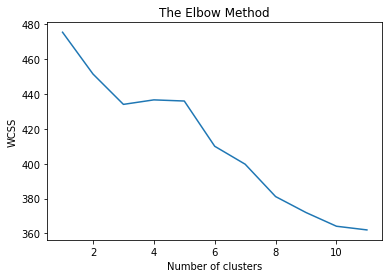

In [65]:
#Plot for the Elbow Method
plt.plot(range(1,12),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
# plt.savefig('elbow.png')
plt.show()

In [67]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(abst)
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 amigos
 distribuyendo
 andan
 azcapotzalco
 iztapalapa
 tkwnjpoony
 eldiamantenegro
 debemos
 ya
 en
Cluster 1:
 la
 el
 vacuna
 que
 rt
 https
 en
 contra
 los
 se
Cluster 2:
 llevar
 comienza
 eeuu
 distribució
 united
 airlines
 anuncia
 alertanews24
 urgente
 todo


Prediction
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 2 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1